In [30]:
import pandas as pd
df0=pd.read_csv('./data/homeprices2.csv')

In [31]:
df0

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [10]:
dum=pd.get_dummies(df0.town)
df=pd.concat([df0,dum],axis='columns')

In [11]:
df

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,True,False,False
1,monroe township,3000,565000,True,False,False
2,monroe township,3200,610000,True,False,False
3,monroe township,3600,680000,True,False,False
4,monroe township,4000,725000,True,False,False
5,west windsor,2600,585000,False,False,True
6,west windsor,2800,615000,False,False,True
7,west windsor,3300,650000,False,False,True
8,west windsor,3600,710000,False,False,True
9,robinsville,2600,575000,False,True,False


In [12]:
df.drop(['town'],axis='columns',inplace=True)

In [13]:
df

,area,price,monroe township,robinsville,west windsor
0,2600,550000,True,False,False
1,3000,565000,True,False,False
2,3200,610000,True,False,False
3,3600,680000,True,False,False
4,4000,725000,True,False,False
5,2600,585000,False,False,True
6,2800,615000,False,False,True
7,3300,650000,False,False,True
8,3600,710000,False,False,True
9,2600,575000,False,True,False


In [14]:
df.drop(['west windsor'],axis='columns',inplace=True)
#ifboth0:westwindor

In [20]:
df

df.replace({True: 1, False: 0}, inplace=True)
df


,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [21]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(df[['area','monroe township','robinsville']],df.price)

LinearRegression()

In [26]:
y=model.predict([[2600,0,0]])
y

/home/mahima/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([579723.71533005])

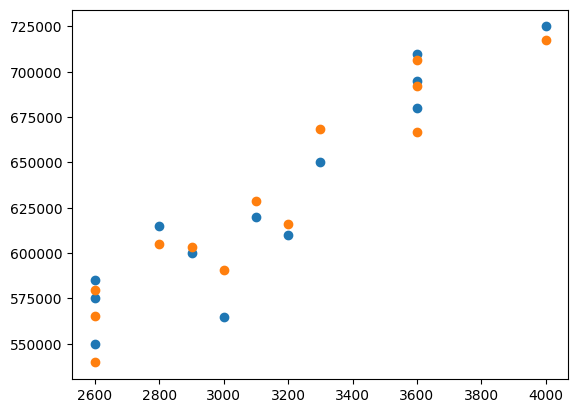

In [24]:
import matplotlib.pyplot as plt
plt.scatter(df.area,df.price)
plt.scatter(df.area,model.predict(df[['area','monroe township','robinsville']]))

In [28]:
model.score(df[['area','monroe township','robinsville']],df.price)

0.9573929037221872

In [34]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dfle=df0
dfle.town=le.fit_transform(dfle.town)
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [35]:
x=dfle[['town','area']].values
x

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]])

In [45]:
y=dfle.price
y
df=dfle

In [59]:
# from sklearn.preprocessing import OneHotEncoder
# ohe=OneHotEncoder(categorical_features=[0])
# x=ohe.fit_transform(x).toarray()
# x


In [61]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Assuming x is your DataFrame
# Example data
x = pd.read_csv('./data/homeprices2.csv')
x=x.drop(['price'],axis='columns')

# Define the transformer
transformer = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(), [0])  # Apply OneHotEncoder to the first column
    ],
    remainder='passthrough'  # Leave the rest of the columns untouched
)

# Fit and transform the data
x_transformed = transformer.fit_transform(x)
print(x_transformed)




[[1.0e+00 0.0e+00 0.0e+00 2.6e+03]
 [1.0e+00 0.0e+00 0.0e+00 3.0e+03]
 [1.0e+00 0.0e+00 0.0e+00 3.2e+03]
 [1.0e+00 0.0e+00 0.0e+00 3.6e+03]
 [1.0e+00 0.0e+00 0.0e+00 4.0e+03]
 [0.0e+00 0.0e+00 1.0e+00 2.6e+03]
 [0.0e+00 0.0e+00 1.0e+00 2.8e+03]
 [0.0e+00 0.0e+00 1.0e+00 3.3e+03]
 [0.0e+00 0.0e+00 1.0e+00 3.6e+03]
 [0.0e+00 1.0e+00 0.0e+00 2.6e+03]
 [0.0e+00 1.0e+00 0.0e+00 2.9e+03]
 [0.0e+00 1.0e+00 0.0e+00 3.1e+03]
 [0.0e+00 1.0e+00 0.0e+00 3.6e+03]]


In [62]:
X=x_transformed[:,1:] # DROP FIRST COLOUMN

In [63]:
X

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [64]:
model.fit(X,y)

LinearRegression()

In [65]:
model.score(X,y)

0.9573929037221873

In [66]:
model.predict([[1,0,2800]])

array([590775.63964739])

In [67]:
#Exercise
df=pd.read_csv('./data/carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [68]:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Car Model']=le.fit_transform(dfle.town)
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,0,69000,18000,6
1,0,35000,34000,3
2,0,57000,26100,5
3,0,22500,40000,2
4,0,46000,31500,4
5,2,59000,29400,5
6,2,52000,32000,5
7,2,72000,19300,6
8,2,91000,12000,8
9,1,67000,22000,6


In [69]:
df0=df.drop('Sell Price($)',axis='columns')

In [70]:
df0

,Car Model,Mileage,Age(yrs)
0,0,69000,6
1,0,35000,3
2,0,57000,5
3,0,22500,2
4,0,46000,4
5,2,59000,5
6,2,52000,5
7,2,72000,6
8,2,91000,8
9,1,67000,6


In [71]:
transformer = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(), [0])  # Apply OneHotEncoder to the first column
    ],
    remainder='passthrough'  # Leave the rest of the columns untouched
)

# Fit and transform the data
x_transformed = transformer.fit_transform(df0)
print(x_transformed)


[[1.00e+00 0.00e+00 0.00e+00 6.90e+04 6.00e+00]
 [1.00e+00 0.00e+00 0.00e+00 3.50e+04 3.00e+00]
 [1.00e+00 0.00e+00 0.00e+00 5.70e+04 5.00e+00]
 [1.00e+00 0.00e+00 0.00e+00 2.25e+04 2.00e+00]
 [1.00e+00 0.00e+00 0.00e+00 4.60e+04 4.00e+00]
 [0.00e+00 0.00e+00 1.00e+00 5.90e+04 5.00e+00]
 [0.00e+00 0.00e+00 1.00e+00 5.20e+04 5.00e+00]
 [0.00e+00 0.00e+00 1.00e+00 7.20e+04 6.00e+00]
 [0.00e+00 0.00e+00 1.00e+00 9.10e+04 8.00e+00]
 [0.00e+00 1.00e+00 0.00e+00 6.70e+04 6.00e+00]
 [0.00e+00 1.00e+00 0.00e+00 8.30e+04 7.00e+00]
 [0.00e+00 1.00e+00 0.00e+00 7.90e+04 7.00e+00]
 [0.00e+00 1.00e+00 0.00e+00 5.90e+04 5.00e+00]]


In [72]:
model=LinearRegression()
model.fit(x_transformed,df['Sell Price($)'])

LinearRegression()

In [73]:
model.score(x_transformed,df['Sell Price($)'])

0.9417050937281083

In [74]:
model.predict([[0,1,0,45000,4]])

array([36991.31721061])

In [76]:
model.predict([[1.00e+00, 0.00e+00 ,0.00e+00 ,6.90e+04, 6.00e+00]])

array([18705.27236441])